# Random Walk
## Packages and Config

In [189]:
include("RandomWalk.jl")
using Plots, ColorSchemes, LaTeXStrings, DelimitedFiles, StatsBase, Distributions
figpath = "../fig/random-walk/"

"../fig/random-walk/"

## No Boundaries

In [58]:
time, p, walks = 2000, 0.8, 10000000
percent = Integer(round(p * 100))

80

In [59]:
coordinates, path = RandomWalk.randomwalk1d(time, p, walks=walks)

(Integer[1010, 1016, 1018, 1020, 1022, 1024, 1026, 1028, 1030, 1032  …  1360, 1362, 1364, 1366, 1368, 1372, 1374, 1378, 1380, 1382], [1.0, 3.0, 1.0, 3.0, 4.0, 2.0, 4.0, 3.0, 5.0, 5.0  …  6.0, 9.0, 3.0, 4.0, 2.0, 1.0, 2.0, 1.0, 1.0, 1.0])

In [60]:
# expected distribution
# units are normalized in a way that l=1 and τ=1
σ² = 4 * p * (1 - p) * time
σ = √σ²
meanpos = (2p - 1) * time
dist = Normal(meanpos, σ)

Normal{Float64}(μ=1200.0000000000002, σ=35.77708763999663)

In [61]:
# simulated distribution
meanpossim = mean(coordinates, weights(path))
# weighted standard deviation
σsim = √(sum(path .* (coordinates .- mean(coordinates, weights(path))).^2) / sum(path))

35.78317989538883

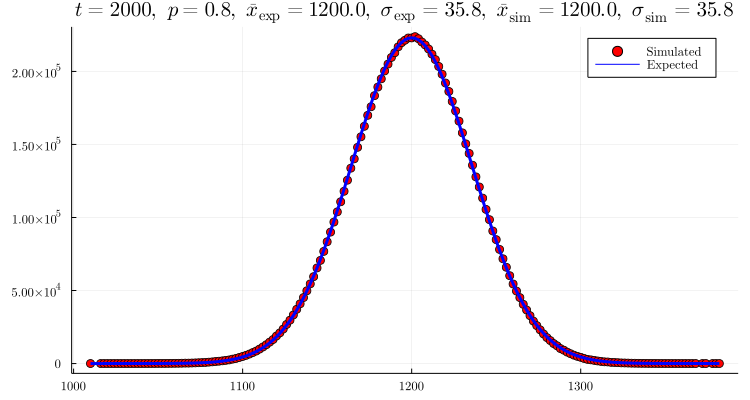

In [62]:
pl = scatter(coordinates, path, color=:red, ms=5, label="Simulated", fontfamily="Computer Modern",
    title="\$t=$time,\\ p=$p,\\ \\bar{x}_{\\textrm{exp}}=$(round(meanpos, digits=1)),\\ "
    * "\\sigma_{\\textrm{exp}} = $(round(σ, digits=1)),\\ "
    * "\\bar{x}_{\\textrm{sim}} = $(abs(round(meanpossim, digits=1))),\\ "
    * "\\sigma_{\\textrm{sim}} = $(round(σsim, digits=1))\$", size = (750, 400))
plot!(pl, coordinates, pdf(dist, coordinates) .* 2walks, color=:blue, lw=3, label="Expected")
# the distribution is multiplied by twice the number of walks, because in 1D random walk there will be
# gaps in odd and even spaces repeatedly one step in between.

savefig(pl, figpath * "randomwalk-$percent.pdf")
display(pl)

## Trapping (Absorbing) Boundaries
### Simulated

In [130]:
minlen, maxlen, walks, samples = 20, 200, 100000, 21
lengths = round.(Integer, range(minlen, maxlen, length = 10))

10-element Vector{Int64}:
  20
  40
  60
  80
 100
 120
 140
 160
 180
 200

In [190]:
initpositions = Matrix{Float64}(undef, samples, 10)
lifetimes_avg = Matrix{Float64}(undef, samples, 10)

for i in 1:10
    len = lengths[i]
    initpos = round.(Integer, range(-len ÷ 2, len ÷ 2, length = samples))
    initpositions[:, i] = initpos
    lifetimes_avg[:, i] = RandomWalk.rwtrap1d_lifetime.(len, initpos, walks)
end

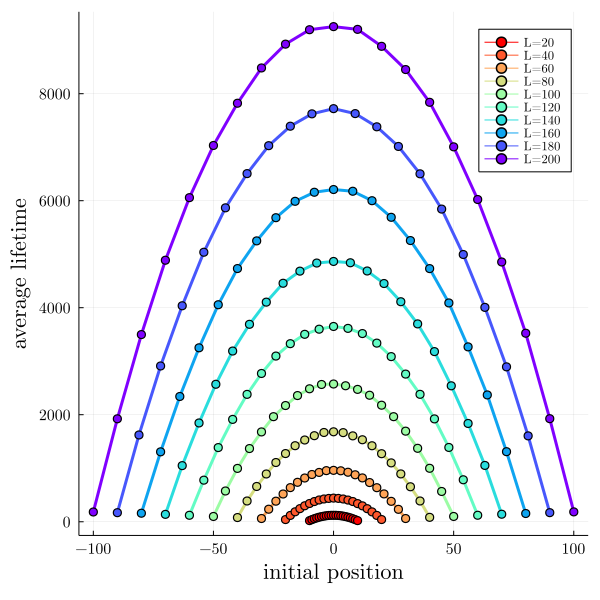

In [191]:
labels_corrected = Array{String}(undef, 1, 10)
labels = ["L=" * string(len) for len in lengths]
for i in 1:10
    labels_corrected[1, i] = labels[i]
end

pl = plot(initpositions, lifetimes_avg, marker=:circle, lw=3, ms=5,
    palette=palette(:rainbow1, 10, rev=true), size = (600, 600),
    labels=labels_corrected, xlabel="initial position", ylabel="average lifetime",
    fontfamily="Computer Modern", tickfontsize=10, labelfontsize=14)

savefig(pl, figpath * "randomwalk-trap-sim.pdf")
display(pl)

### Expected

In [194]:
initpositions = Matrix{Float64}(undef, samples, 10)
lifetimes_exp = Matrix{Float64}(undef, samples, 10)

for i in 1:10
    len = lengths[i]
    initpos = round.(Integer, range(-len ÷ 2, len ÷ 2, length = samples))
    initpositions[:, i] = initpos
    lifetimes_exp[:, i] = RandomWalk.rwtrap1d_lifetime_exp.(len, initpos)
end

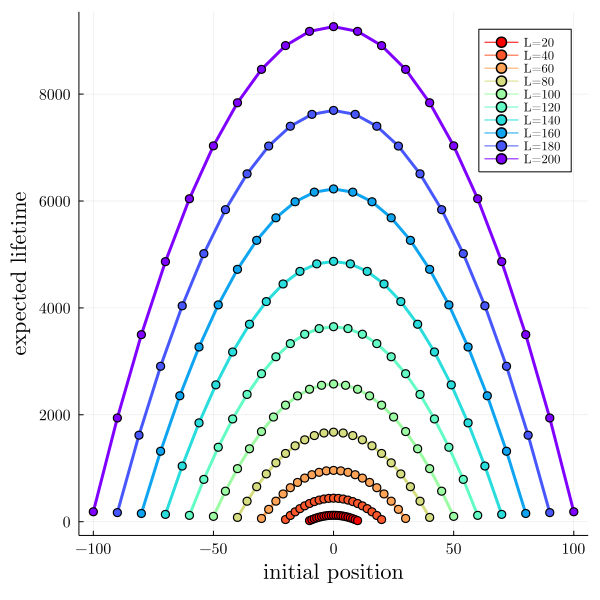

In [195]:
labels_corrected = Array{String}(undef, 1, 10)
labels = ["L=" * string(len) for len in lengths]
for i in 1:10
    labels_corrected[1, i] = labels[i]
end

pl = plot(initpositions, lifetimes_exp, marker=:circle, lw=3, ms=5,
    palette=palette(:rainbow1, 10, rev=true), size = (600, 600),
    labels=labels_corrected, xlabel="initial position", ylabel="expected lifetime",
    fontfamily="Computer Modern", tickfontsize=10, labelfontsize=14)

savefig(pl, figpath * "randomwalk-trap-exp.pdf")
display(pl)

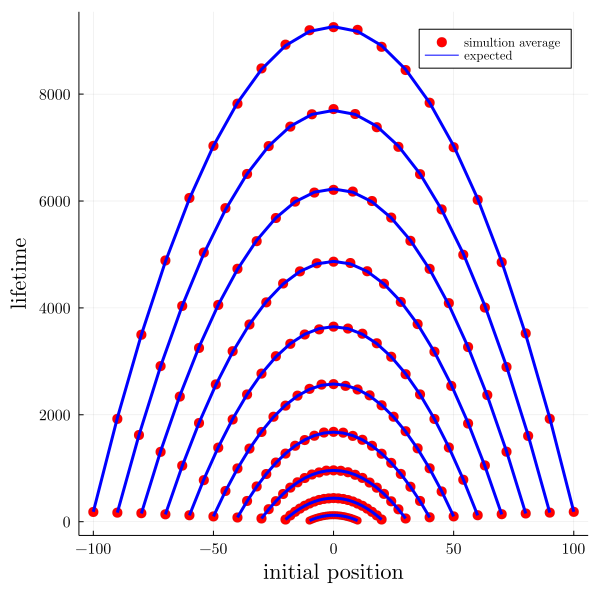

In [196]:
pl = scatter(initpositions[:, 1], lifetimes_avg[:, 1], color=:red, ms=5, markerstrokewidth=0,
    xlabel="initial position", ylabel="lifetime", label="simultion average",
    fontfamily="Computer Modern", tickfontsize=10, labelfontsize=14, size = (600, 600))
plot!(pl, initpositions[:, 1], lifetimes_exp[:, 1], color=:blue, lw=3, label="expected")

for i in 2:10
    scatter!(initpositions[:, i], lifetimes_avg[:, i], color=:red, label=false, ms=6, markerstrokewidth=0)
    plot!(pl, initpositions[:, i], lifetimes_exp[:, i], color=:blue, label=false, lw=3)
end

savefig(pl, figpath * "randomwalk-trap.pdf")
display(pl)